In [103]:
import pandas
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data_dir = "../../data/"
data = pandas.read_pickle(data_dir + 'metadata.pickle')

In [196]:
def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')


cols = pandas.DataFrame()
cols["min"] = data.min()
cols["count"] = cols.apply(lambda c: data[c.name].count(), axis=1)
#cols["unique"] = pandas.unique(data.describe)
cols["max"] = data.max()
print_full(cols)

                                                                                    min  \
Id                                                                                    1   
Systole                                                                             4.6   
Diastole                                                                           10.5   
AcquisitionMatrix                                                      [0, 144, 144, 0]   
AcquisitionNumber                                                                     1   
AcquisitionTime                                                           081104.527500   
AngioFlag                                                                             N   
BitsAllocated                                                                        16   
BitsStored                                                                           16   
BodyPartExamined                                                                   HEAD   

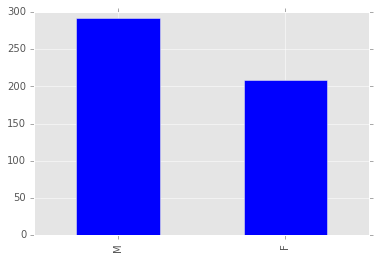

In [105]:
data['PatientSex'].value_counts().plot(kind='bar')

In [56]:
data['PatientAge'] = data['PatientAge'].apply(lambda x: int(x[:-1]))


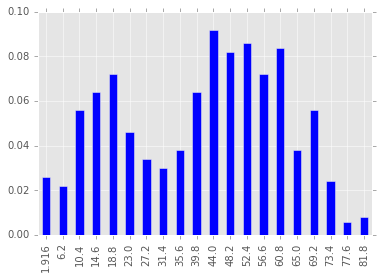

In [83]:
data['PatientAge'].value_counts(sort=False, normalize=True, bins=20).plot(kind='bar')

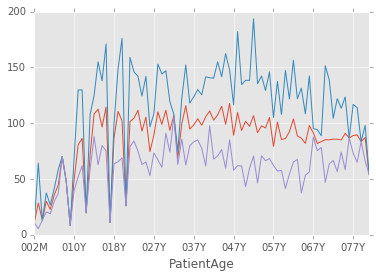

In [112]:
data['BloodVolume'] =  data.Diastole - data.Systole
data.groupby('PatientAge').BloodVolume.mean().plot()
data.groupby('PatientAge').BloodVolume.max().plot()
data.groupby('PatientAge').BloodVolume.min().plot()

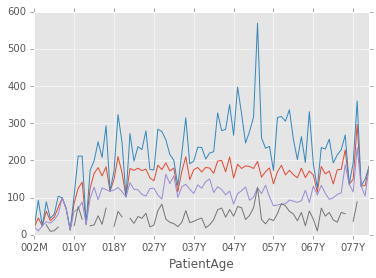

In [221]:
data.groupby('PatientAge').Diastole.mean().plot()
data.groupby('PatientAge').Diastole.max().plot()
data.groupby('PatientAge').Diastole.min().plot()
data.groupby('PatientAge').Diastole.std().plot()

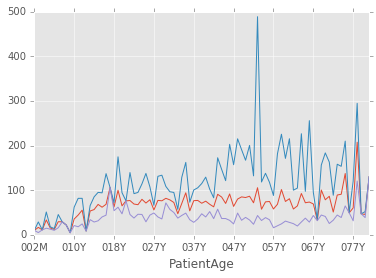

In [114]:
data.groupby('PatientAge').Systole.mean().plot()
data.groupby('PatientAge').Systole.max().plot()
data.groupby('PatientAge').Systole.min().plot()

In [121]:
men = data.loc[data.PatientSex == 'M']
women = data.loc[data.PatientSex == 'F']


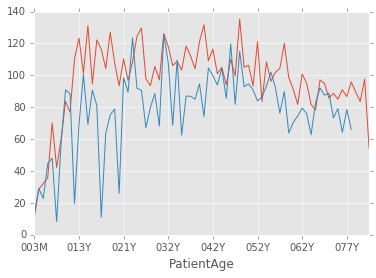

In [123]:
men.groupby('PatientAge').BloodVolume.mean().plot()
women.groupby('PatientAge').BloodVolume.mean().plot()


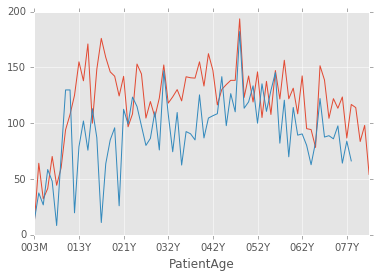

In [124]:
men.groupby('PatientAge').BloodVolume.max().plot()
women.groupby('PatientAge').BloodVolume.max().plot()

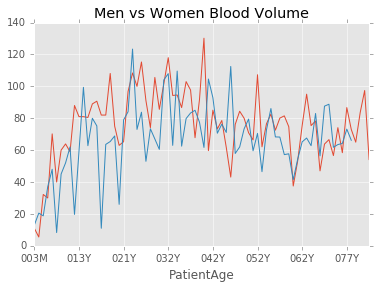

In [219]:
men.groupby('PatientAge').BloodVolume.min().plot(title="Men vs Women Blood Volume")
women.groupby('PatientAge').BloodVolume.min().plot()

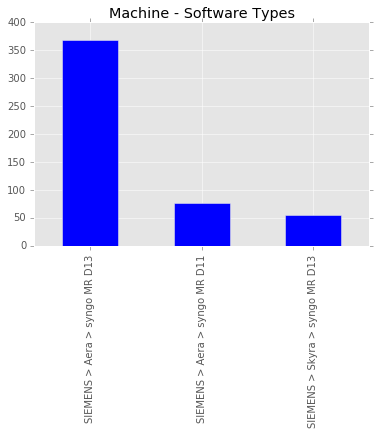

In [223]:
# What are the different machines?
data["Machine"] = data.Manufacturer + " > " + data.ManufacturerModelName + " > " + data.SoftwareVersions
data.Machine.value_counts().plot(kind='bar', title="Machine - Software Types")